<a href="https://colab.research.google.com/github/silviabarasa/WEEK9COREIP/blob/master/WEEK9IP_KNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='yellow'>Python Programming:kNN Classifiers</font>

## <font color='orange'>***Defining the Question***</font>

### <font color='green'>a) ***Specifying the Data Analytic Question***</font>
conduct experiments on the dataset by Building a K-nearest neighbor (kNN) model classifier and a Naive Bayes model classifier then calculate the resulting metrics.

### <font color='green'>b) ***Defining the metrics for success***</font>
Implementing a K-nearest neighbor (kNN) classifier on the provided dataset.

### <font color='green'>***c) Understanding the context***</font>
Implementing a K-nearest neighbor (kNN) classifier on the provided dataset.

i) <font fontweight='bold'>Dataset1</font>

The dataset1 has the following features: The titanic.csv file contains data for 887 of the real Titanic passengers. Each row represents one person. The columns describe different attributes about the person including:

- survived
- Age
- passenger-class
- sex
- fare
- Embarked



### <font color='green'>***d) Recording the Experimental Design***</font>
Steps to implement:

- Data Pre-processing step
- EDA
- Fitting the model(KNN) to the Training set
- Predicting the test result
- Test accuracy of the result(Creation of Confusion matrix)
- Visualizing the test set result.

### <font color='green'>***e) Data Relevance***</font>
The data used for this project is necessary for building a model that implements the KNN classifier

[https://archive.org/download/train5_202002/train%20%285%29.csv].

# <font color='orange'>***Importing the required libraries***</font>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [ ]:
train = pd.read_csv('/content/train (5).csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test = pd.read_csv('/content/test (1).csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# <font color='orange'>***Checking Data***</font>

In [ ]:
#
# Previewing the top of our dataset
#
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#
# Previewing the top of our dataset
#
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#
# Previewing the bottom of our dataset
#
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
#
# Previewing the bottom of our dataset
#
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
#Checking information about our dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#Checking information about our dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
#checking the shape for the datasets
train.shape,test.shape

((891, 12), (418, 11))

In [ ]:
#Checking our columns
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
#Checking our columns
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# <font color='orange'>***External Data Source Validation***</font>
a.Validation

1.Dataset 1.https://www.openml.org/data/get_csv/16826755/phpMYEkMl

2.Dataset 2.https://www.wolframcloud.com/objects/9cb5e76b-d099-4960-a797-81f4c5742c30

# <font color='orange'>***Data Cleaning***</font>

#### <font color='*green*'>***Validity***</font>

In [ ]:
#Setting passengerID as index
train.set_index('PassengerId',inplace=True)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Setting passengerID as index
test.set_index('PassengerId',inplace=True)
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


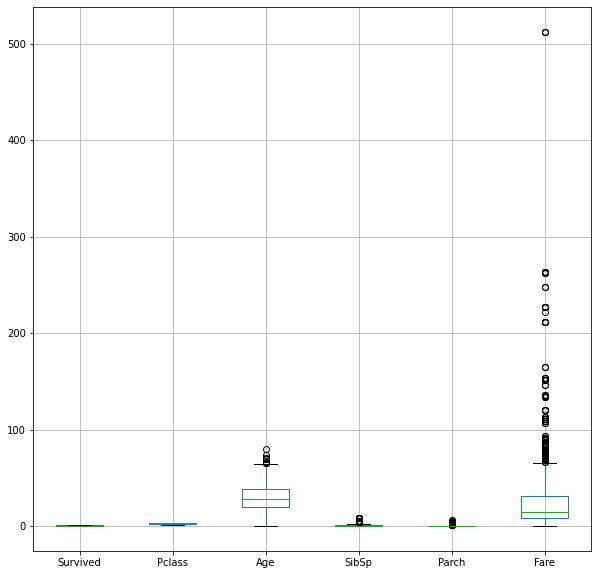

In [ ]:
#Checking for outliers
check=['Survived','Pclass','Age','SibSp','Parch', 'Fare']

plt.subplots(figsize=(10,10))
train.boxplot(check)
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


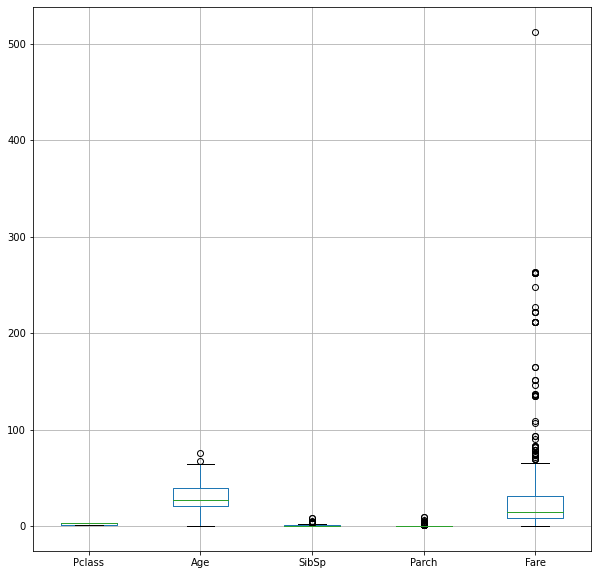

In [ ]:
#Checking for outliers
check=['Pclass','Age','SibSp','Parch', 'Fare']

plt.subplots(figsize=(10,10))
test.boxplot(check)
plt.show()

#### <font color='green'>***Completeness***</font>

In [ ]:
#Checking for null values
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
#Checking for null values
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [ ]:
#Dealing with null vakues
#MODE IMPUTATION
cols = ['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

train[cols]=train[cols].fillna(train.mode().iloc[0])

In [ ]:
#Dealing with null vakues
#MODE IMPUTATION
cols = ['Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

test[cols]=test[cols].fillna(test.mode().iloc[0])

In [ ]:
#Checking if our null values were filled
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [ ]:
#Checking if our null values were filled
test.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

### <font color='green'>***Consistency***</font>

In [ ]:
#Checking for duplicates 
train.duplicated().sum()

0

In [ ]:
#Checking for duplicates 
test.duplicated().sum()

0

### <font color='green'>***Uniformity***</font>

In [ ]:
#Converting columns to lowercase
train.columns = train.columns.str.strip().str.lower()
train.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

In [ ]:
#Converting columns to lowercase
test.columns = test.columns.str.strip().str.lower()
test.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked'],
      dtype='object')

In [ ]:
train.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [ ]:
test.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,B57 B59 B63 B66,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,B57 B59 B63 B66,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,B57 B59 B63 B66,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,B57 B59 B63 B66,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,B57 B59 B63 B66,S


# <font color='orange'>***Exploratory Data Analysis***</font>

## <font color='green'>***Univariate Data Analysis***</font>

#### <font color='violet'>***Categorical Variables***</font>

> Frequency Tables

In [ ]:
data = train.sex.value_counts()
data

male      577
female    314
Name: sex, dtype: int64

Male were the most as compared to the females

In [ ]:
data1=train.embarked.value_counts()
data1

S    646
C    168
Q     77
Name: embarked, dtype: int64

> S recorded highest followed by c and lastly Q

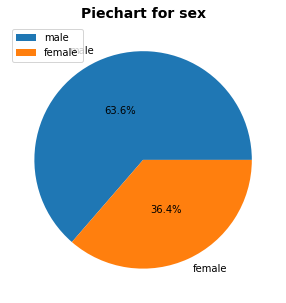

In [ ]:
#Using matplotlib
pie, ax = plt.subplots(figsize=[10,5])
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.legend(loc='upper left')
plt.title("Piechart for sex", fontsize=14, fontweight='bold');

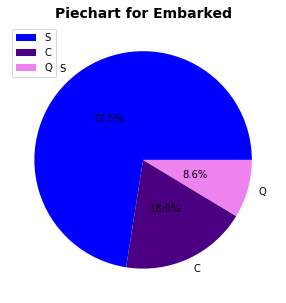

In [ ]:
#Using matplotlib
pie, ax = plt.subplots(figsize=[10,5])
labels = data1.keys()
colors = ['blue','indigo','violet']
plt.pie(x=data1, autopct="%.1f%%",colors=colors,labels=labels, pctdistance=0.5)
plt.legend(loc='upper left')
plt.title("Piechart for Embarked", fontsize=14, fontweight='bold');

### <font color=green>***Numerical variables***</font>

> Survived

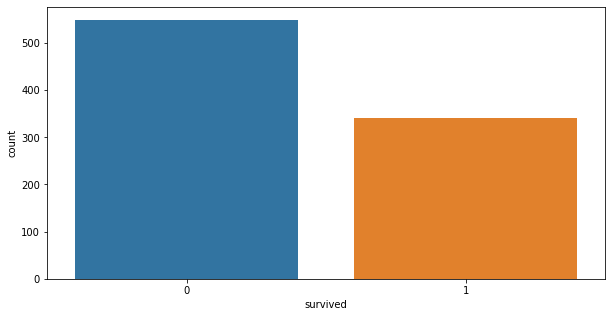

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


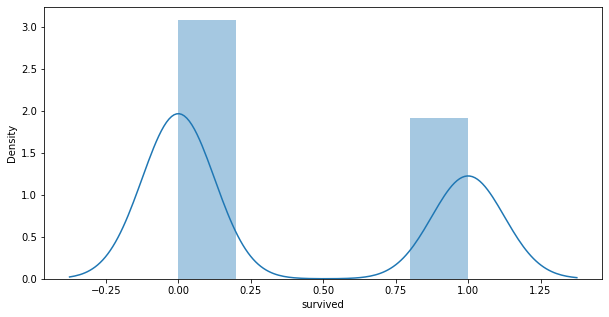

In [ ]:
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot
plt.figure(figsize=(10,5))
sns.countplot(x='survived', data=train)
plt.show()

# Histogram
plt.figure(figsize=(10,5))
sns.distplot(train['survived'])
plt.show()

> Those who didnot survive were most as compared to those who survived

> Age

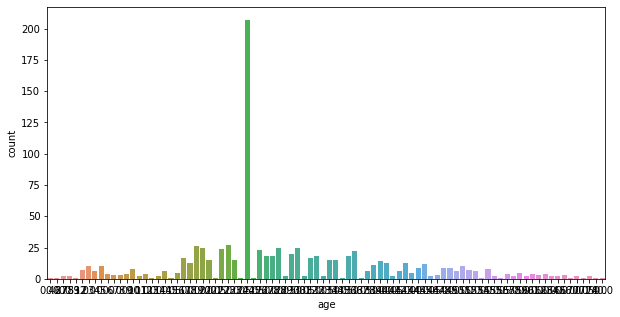

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


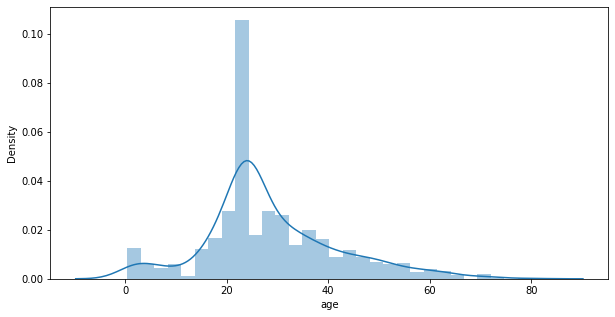

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot
plt.figure(figsize=(10,5))
sns.countplot(x='age', data=train)
plt.show()

# Histogram
plt.figure(figsize=(10,5))
sns.distplot(train['age'])
plt.show()

> pclass

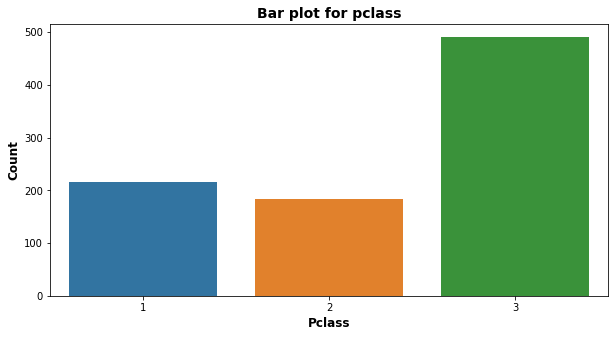

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


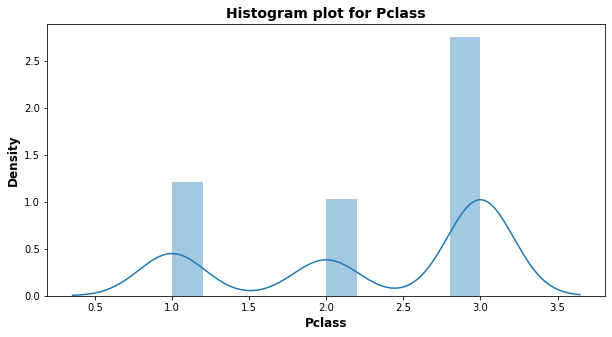

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot
plt.figure(figsize=(10,5))
sns.countplot(x='pclass', data=train)
plt.title('Bar plot for pclass', fontweight='bold', fontsize=14)
plt.xlabel('Pclass', fontweight='bold', fontsize=12)
plt.ylabel('Count', fontweight='bold', fontsize=12)
plt.show()

# Histogram
plt.figure(figsize=(10,5))
sns.distplot(train['pclass'])
plt.title('Histogram plot for Pclass', fontweight='bold', fontsize=14)
plt.xlabel('Pclass', fontweight='bold', fontsize=12)
plt.ylabel('Density', fontweight='bold', fontsize=12)
plt.show()

> Pclass 3 had the highest number followed by 1 then 2

>

> sibsp

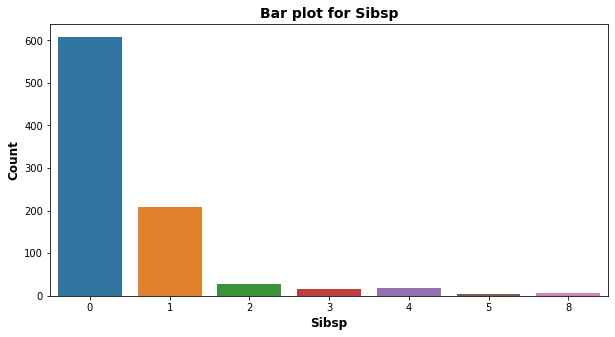

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


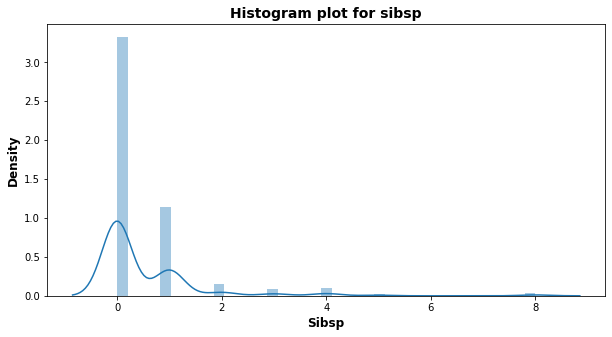

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot
plt.figure(figsize=(10,5))
sns.countplot(x='sibsp', data=train)
plt.title('Bar plot for Sibsp', fontweight='bold', fontsize=14)
plt.xlabel('Sibsp', fontweight='bold', fontsize=12)
plt.ylabel('Count', fontweight='bold', fontsize=12)
plt.show()

# Histogram
plt.figure(figsize=(10,5))
sns.distplot(train['sibsp'])
plt.title('Histogram plot for sibsp', fontweight='bold', fontsize=14)
plt.xlabel('Sibsp', fontweight='bold', fontsize=12)
plt.ylabel('Density', fontweight='bold', fontsize=12)
plt.show()

> Sibsp 0 had the highest number 

>parch

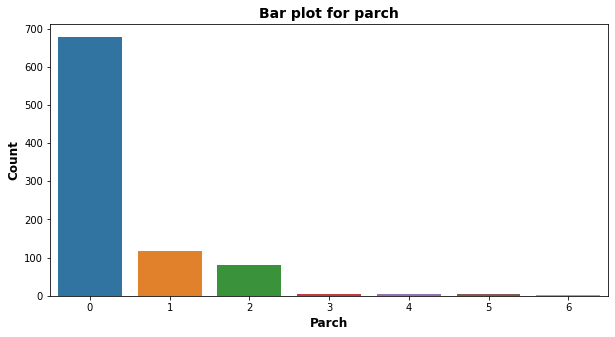

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


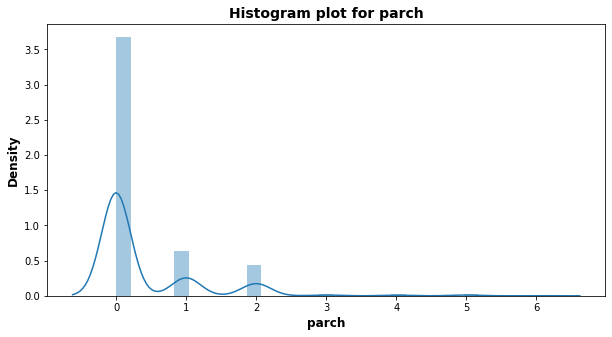

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot
plt.figure(figsize=(10,5))
sns.countplot(x='parch', data=train)
plt.title('Bar plot for parch', fontweight='bold', fontsize=14)
plt.xlabel('Parch', fontweight='bold', fontsize=12)
plt.ylabel('Count', fontweight='bold', fontsize=12)
plt.show()

# Histogram
plt.figure(figsize=(10,5))
sns.distplot(train['parch'])
plt.title('Histogram plot for parch', fontweight='bold', fontsize=14)
plt.xlabel('parch', fontweight='bold', fontsize=12)
plt.ylabel('Density', fontweight='bold', fontsize=12)
plt.show()

> Parch 0 had the highest number

## <font color=green>***Bivariate Analysis***</font>

#### <font color=violet>***Categorical to categorical***</font>

Text(0, 0.5, 'Embarked')

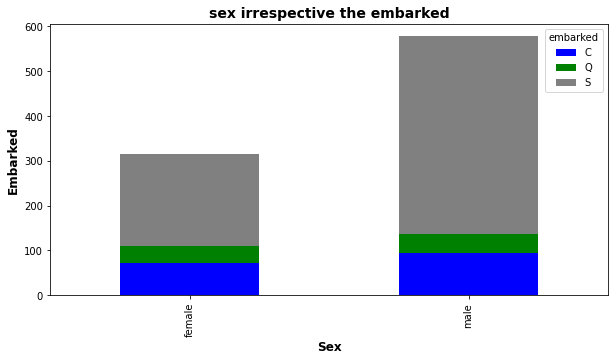

In [ ]:
#Stacked bar chart of weekday with day type
pd.crosstab(train['sex'],train['embarked']).plot(kind="bar",stacked=True,figsize=(10,5) , color=['blue','green','grey'])
plt.title('sex irrespective the embarked', fontweight='bold', fontsize=14)
plt.xlabel('Sex', fontweight='bold', fontsize=12)
plt.ylabel('Embarked', fontweight='bold', fontsize=12)

> In sex the embarked S had the highest number

###<font color=violet>***Numerical to Numerical***</font>

Text(0, 0.5, 'Survived')

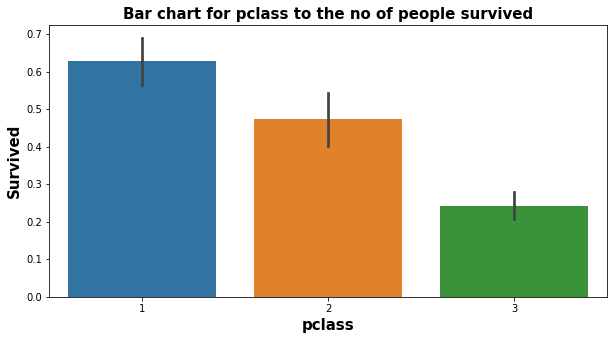

In [ ]:
#Bar chart for pclass to survived
plt.figure(figsize=(10,5))
ax = sns.barplot(x="pclass", y="survived", data=train)
plt.title('Bar chart for pclass to the no of people survived', fontweight='bold',fontsize=15)
plt.xlabel('pclass',fontweight='bold',fontsize=15)
plt.ylabel('Survived',fontweight='bold',fontsize=15)

> Pclass 1 had the highest number of survival

Text(0, 0.5, 'Survived')

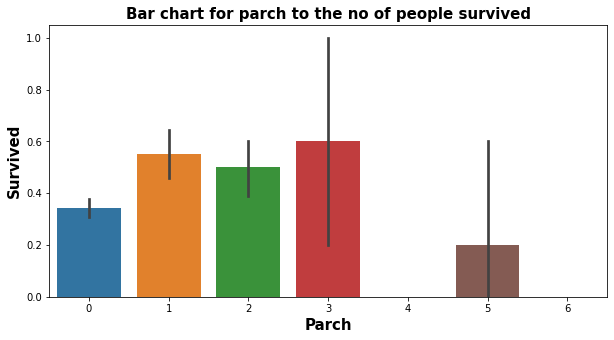

In [ ]:
#Bar chart for parch to survived
plt.figure(figsize=(10,5))
ax = sns.barplot(x="parch", y="survived", data=train)
plt.title('Bar chart for parch to the no of people survived', fontweight='bold',fontsize=15)
plt.xlabel('Parch',fontweight='bold',fontsize=15)
plt.ylabel('Survived',fontweight='bold',fontsize=15)

> Parch 1 recorded the highest number of survival

Text(0, 0.5, 'Survived')

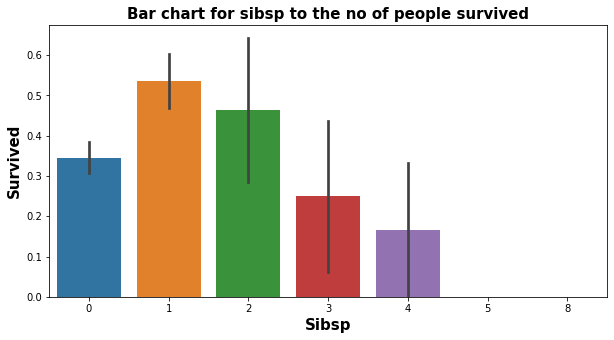

In [ ]:
#Bar plot for sibsp to survived
plt.figure(figsize=(10,5))
ax = sns.barplot(x="sibsp", y="survived", data=train)
plt.title('Bar chart for sibsp to the no of people survived', fontweight='bold',fontsize=15)
plt.xlabel('Sibsp',fontweight='bold',fontsize=15)
plt.ylabel('Survived',fontweight='bold',fontsize=15)

Text(0, 0.5, 'age')

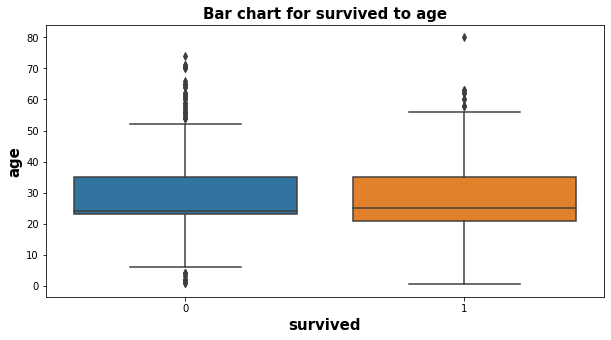

In [ ]:
#Bar plot of survived to age
plt.figure(figsize=(10,5))
sns.boxplot(x='survived', y='age', data=train)
plt.title('Bar chart for survived to age', fontweight='bold',fontsize=15)
plt.xlabel('survived',fontweight='bold',fontsize=15)
plt.ylabel('age',fontweight='bold',fontsize=15)

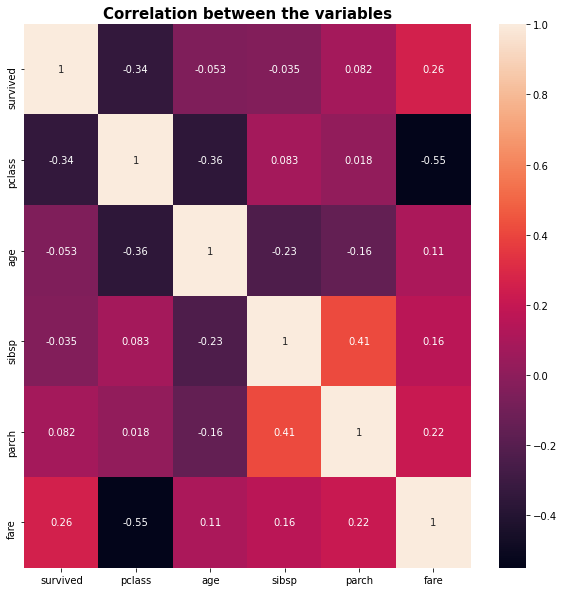

In [ ]:
# plotting the correlation using a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True)
plt.title('Correlation between the variables',fontsize=15,fontweight='bold')
plt.show()

In [ ]:
#Correlation
train.corr()

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.052872,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.356187,0.083081,0.018443,-0.549500
age,-0.052872,-0.356187,1.000000,-0.232411,-0.155118,0.107554
sibsp,-0.035322,0.083081,-0.232411,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.155118,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.107554,0.159651,0.216225,1.000000


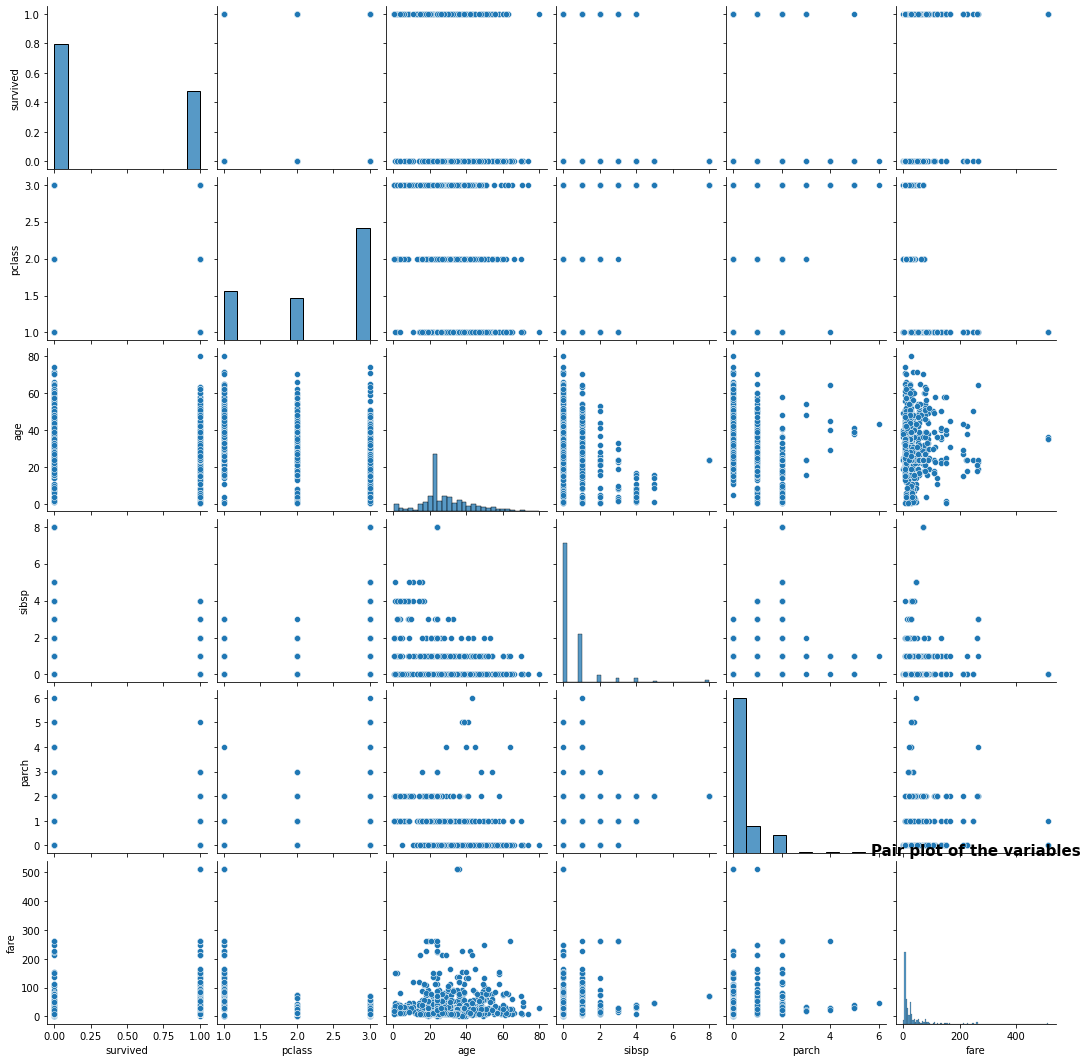

In [ ]:
#Plotting a pair plot
sns.pairplot(train)
plt.title('Pair plot of the variables',fontweight='bold',fontsize=15)
plt.show()

Interpretation The correlation coefficient ranges from -0.6 to +1.

if the coefficients are close to +1, then that shows the strong positive correlation between variables. however in this case, there are no cases of strong positive correlation between the variables. instead, they are positive and close to zero, and indication that the correlation is zero or something close to zero.

with the correlation coefficients going beyond the zero line to -0.689, it is said that the variables, in this case, fare and pclass are strongly negatively correlated.

# <font color=orange>***Implementing the Solution***</font>

## <font color=green>***k Nearest Neighbours***</font>

####<font color=violet>***PART 1: 80:20 partition***</font>

In [ ]:
train.head(1)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,B96 B98,S


In [ ]:
train.drop({'name','ticket'},axis=1,inplace=True)

> <font color=cyan>***Encoding categorical variables***</font>

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in columns
train['sex']= label_encoder.fit_transform(train['sex'])
train['cabin']= label_encoder.fit_transform(train['cabin'])
train['embarked']= label_encoder.fit_transform(train['embarked'])

><font color=cyan>***Data Preparation***</font>

In [ ]:
# create X (features) and y (response)
X = train.drop(['survived'],axis=1).values
y = train['survived'].values

><font color=cyan>***Splitiing data***</font>

In [ ]:
# Train Test Split
# ---
# To avoid over-fitting, we will divide our dataset into training and test splits, 
# which gives us a better idea as to how our algorithm performed during the testing phase. 
# This way our algorithm is tested on un-seen data
# ---
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
# checking the shapes of the train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(712, 8)
(712,)
(179, 8)
(179,)


<font color=cyan>***Feature Scaling***</font>

In [ ]:
# feature scaling 
# normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
#
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-1.58883337, -1.37633896,  1.84479162, ...,  0.38176402,
        -0.23521269,  0.58703762],
       [ 0.81296994, -1.37633896,  0.77873852, ..., -0.01974031,
        -0.27820921,  0.58703762],
       [ 0.81296994,  0.7265652 , -0.28731457, ..., -0.64124713,
        -0.27820921,  0.58703762],
       ...,
       [ 0.81296994, -1.37633896, -2.13387082, ..., -0.25854002,
        -0.27820921, -1.90831034],
       [-1.58883337,  0.7265652 ,  1.76864497, ...,  0.94158318,
         3.46248787,  0.58703762],
       [ 0.81296994,  0.7265652 , -0.28731457, ..., -0.49717281,
        -0.27820921,  0.58703762]])

<font color=cyan>***Training our Algorithm***</font>

In [ ]:
# Fitting K Neighbours Classifier to the training eet
# Training and Making Predictions
from sklearn.neighbors import KNeighborsClassifier
# instantiating the model
clf = KNeighborsClassifier(n_neighbors=5)
# fitting the model to the training set
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

<font color=cyan>***Making Prediction***</font>

In [ ]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0])

<font color=cyan>***Evaluating our Algorithm***</font>

In [ ]:
# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
from sklearn.metrics import classification_report, confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[86  6]
 [29 58]]
              precision    recall  f1-score   support

           0       0.75      0.93      0.83        92
           1       0.91      0.67      0.77        87

    accuracy                           0.80       179
   macro avg       0.83      0.80      0.80       179
weighted avg       0.82      0.80      0.80       179



The confusion matrix is used to measure the performance of an machine learning algorithm, usually a supervised learning one.

Each row of the confusion matrix represents the instances of an actual class and each column represents the instances of a predicted class.

that is evident with the matrix shown above

True Positives(TP) =  86

True Negatives(TN) =  58

False Positives(FP) =  6

False Negatives(FN) =  29
The confusion matrix shows 86 + 58 = 144 correct predictions and 6 + 29 = 35 incorrect predictions.



In [ ]:
# Making our prediction
print(mean_squared_error(y_test, y_pred))

0.19553072625698323


<font color=cyan>***Visualizing***</font>

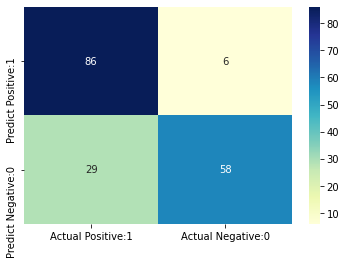

In [ ]:
# visualizing the confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

><font color=cyan>***Accuracy***</font>

In [ ]:
#from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
print('Accuracy of KNN classifier:{}'.format(clf.score(X_test, y_test)))

Accuracy of KNN classifier:0.8044692737430168


Text(0, 0.5, 'Error Rate')

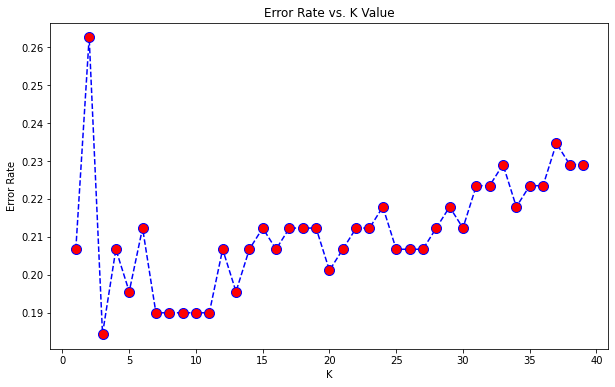

In [ ]:
#Choosing a K Value
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
#getting scores
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 60)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.7932960893854749, 0.7374301675977654, 0.8156424581005587, 0.7932960893854749, 0.8044692737430168, 0.7877094972067039, 0.8100558659217877, 0.8100558659217877, 0.8100558659217877, 0.8100558659217877, 0.8100558659217877, 0.7932960893854749, 0.8044692737430168, 0.7932960893854749, 0.7877094972067039, 0.7932960893854749, 0.7877094972067039, 0.7877094972067039, 0.7877094972067039, 0.7988826815642458, 0.7932960893854749, 0.7877094972067039, 0.7877094972067039, 0.7821229050279329, 0.7932960893854749, 0.7932960893854749, 0.7932960893854749, 0.7877094972067039, 0.7821229050279329, 0.7877094972067039, 0.776536312849162, 0.776536312849162, 0.770949720670391, 0.7821229050279329, 0.776536312849162, 0.776536312849162, 0.7653631284916201, 0.770949720670391, 0.770949720670391, 0.770949720670391, 0.7653631284916201, 0.770949720670391, 0.776536312849162, 0.7653631284916201, 0.7597765363128491, 0.776536312849162, 0.776536312849162, 0.770949720670391, 0.8044692737430168, 0.7932960893854749, 0.8212290502

Text(0.5, 1.0, 'plot of Test Accuracy Score Vs Values of kNN Neighbors')

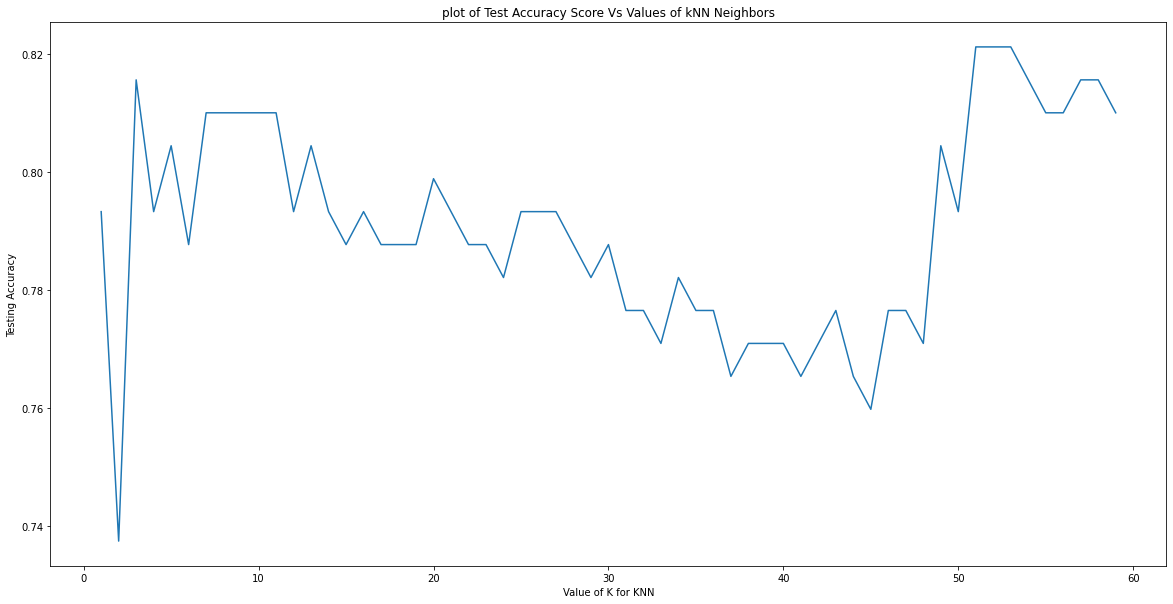

In [ ]:
# plot of scores
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt
# allow plots to appear within the notebook
%matplotlib inline
# plot the relationship between K and testing accuracy
plt.figure(figsize=(20,10))
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.title('plot of Test Accuracy Score Vs Values of kNN Neighbors')

#### <font color =violet>***PART 2: 70:30 partition***</font>

><font color=cyan>***Splitiing data***</font>

In [ ]:
# Train Test Split
# ---
# To avoid over-fitting, we will divide our dataset into training and test splits, 
# which gives us a better idea as to how our algorithm performed during the testing phase. 
# This way our algorithm is tested on un-seen data
# ---
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

><font color=cyan>***Feature Scaling***</font>

In [ ]:
# feature scaling 
# normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
#
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-0.4017063 , -1.34398895, -0.34276504, ..., -0.41840364,
         2.53546317, -0.70882197],
       [-1.61070641,  0.74405373,  1.34784602, ...,  0.68794257,
         2.78240971,  0.57488759],
       [ 0.80729382,  0.74405373,  1.50153794, ..., -0.52027586,
        -0.30442206,  0.57488759],
       ...,
       [ 0.80729382,  0.74405373, -0.11222717, ..., -0.51933323,
        -0.30442206,  0.57488759],
       [-0.4017063 , -1.34398895, -0.72699483, ..., -0.10910255,
        -0.30442206,  0.57488759],
       [ 0.80729382,  0.74405373, -0.419611  , ..., -0.48921433,
        -0.30442206,  0.57488759]])

><font color=cyan>***Training our Algorithm***</font>

In [ ]:
# Fitting K Neighbours Classifier to the training eet
# Training and Making Predictions
from sklearn.neighbors import KNeighborsClassifier
# instantiating the model
clf = KNeighborsClassifier(n_neighbors=5)
# fitting the model to the training set
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

> ><font color=cyan>***Making predictions***</font>

In [ ]:
# The final step is to make predictions on our test data 
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0])

In [ ]:
# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
from sklearn.metrics import classification_report, confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[144  25]
 [ 28  71]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       169
           1       0.74      0.72      0.73        99

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.79       268
weighted avg       0.80      0.80      0.80       268



The confusion matrix is used to measure the performance of an machine learning algorithm, usually a supervised learning one.

Each row of the confusion matrix represents the instances of an actual class and each column represents the instances of a predicted class.

that is evident with the matrix shown above

True Positives(TP) =  144

True Negatives(TN) =  71

False Positives(FP) =  25

False Negatives(FN) =  28

The confusion matrix shows 144 + 71 = 215 correct predictions and 25 + 28 = 53 incorrect predictions.



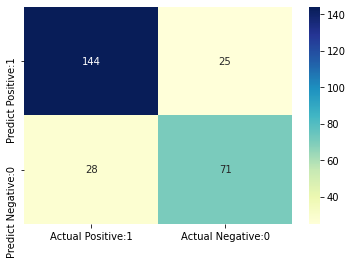

In [ ]:
# visualizing the confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
# Making our prediction
# ---
# 
y_pred = clf.predict(X_test)
print(mean_squared_error(y_test, y_pred))

0.19776119402985073


In [ ]:
#from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
print('Accuracy of KNN classifier:{}'.format(clf.score(X_test, y_test)))

Accuracy of KNN classifier:0.8022388059701493


#### <font color=violet>***PART 3: 60:40 partition***</font>

><font color=cyan>***Splitiing data***</font>

In [ ]:
# Train Test Split
# ---
# To avoid over-fitting, we will divide our dataset into training and test splits, 
# which gives us a better idea as to how our algorithm performed during the testing phase. 
# This way our algorithm is tested on un-seen data
# ---
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

><font color=cyan>***Feature Scaling***</font>

In [ ]:
# feature scaling 
# normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
#
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[ 0.82617043,  0.77073332,  0.12342353, ..., -0.45385035,
        -0.25398277,  0.60308767],
       [ 0.82617043,  0.77073332, -0.31633069, ..., -0.45982736,
        -0.25398277, -0.64034405],
       [ 0.82617043,  0.77073332, -0.82937727, ..., -0.44258599,
        -0.25398277,  0.60308767],
       ...,
       [-1.59122688,  0.77073332, -0.02316121, ...,  0.05097679,
        -1.77086141,  0.60308767],
       [ 0.82617043, -1.29746564, -0.31633069, ..., -0.45936759,
        -0.25398277, -0.64034405],
       [-1.59122688,  0.77073332, -0.31633069, ...,  3.5824679 ,
        -0.25398277, -1.88377577]])

><font color=cyan>***Training our model***</font>

In [ ]:
# Fitting K Neighbours Classifier to the training eet
# Training and Making Predictions
from sklearn.neighbors import KNeighborsClassifier
# instantiating the model
clf = KNeighborsClassifier(n_neighbors=5)
# fitting the model to the training set
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

><font color=cyan>***Making Predictions***</font>

In [ ]:
# The final step is to make predictions on our test data 
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [ ]:
# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
from sklearn.metrics import classification_report, confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[187  37]
 [ 40  93]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       224
           1       0.72      0.70      0.71       133

    accuracy                           0.78       357
   macro avg       0.77      0.77      0.77       357
weighted avg       0.78      0.78      0.78       357



The confusion matrix is used to measure the performance of an machine learning algorithm, usually a supervised learning one.

Each row of the confusion matrix represents the instances of an actual class and each column represents the instances of a predicted class.

that is evident with the matrix shown above

True Positives(TP) =  187

True Negatives(TN) =  93

False Positives(FP) =  37

False Negatives(FN) =  40

The confusion matrix shows 187 + 93 = 280 correct predictions and 37 + 40 = 77 incorrect predictions.



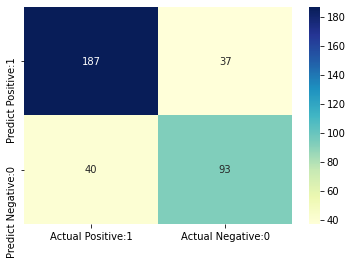

In [ ]:
# visualizing the confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
# Making our prediction
# ---
# 
y_pred = clf.predict(X_test)
print(mean_squared_error(y_test, y_pred))

0.21568627450980393


In [ ]:
#from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
print('Accuracy of KNN classifier:{}'.format(clf.score(X_test, y_test)))

Accuracy of KNN classifier:0.7843137254901961


##<font color=green>***Hyperparameter Optimization using GridSearch CV***</font>

In [ ]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV
k_range=range(1,31)
print(k_range)
param_grid=dict(n_neighbors=k_range)
print (param_grid)
#
grid_search = GridSearchCV(clf,param_grid,cv=10,scoring='accuracy')
#
grid_search.fit(X_train, y_train)

range(1, 31)
{'n_neighbors': range(1, 31)}


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 31)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring='accuracy',
             verbose=0)

In [ ]:
# examining the best model
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))
# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))
# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8368


Parameters that give the best results : 

 {'n_neighbors': 4}


Estimator that was chosen by the search : 

 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')


In [ ]:
# calculating GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.7871


# <font color='green'>***Results and Conclusion***</font>
the partitions were as follows along with their accuracy scores

80:20 - Model accuracy score: 0.8045

70:30 - Model accuracy score: 0.8022

60:40 - Model accuracy score: 0.7843

from the three partitions, the model that was more accurate was the one divided into 80:20 sets. this particular model had an accuracy score of 0.8045

the Parameters that gave the best results :

{'n_neighbors': 4}

# <font color=orange>***Follow up questions***</font>


### <font color =green>***a). Did we have the right data?***</font>
No data had a class imbalance that affects model performance

### <font color=green>***b). Do we need other data to answer our question?***</font>
Yes

### <font color=green>***c). Did we have the right question?***</font>
Yes